In [131]:
import pandas as pd
import numpy as np
# from matplotlib.pyplot import figure
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme="oceans16", grid=False, figsize=(10, 8))

from gensim import corpora, models, similarities
import jieba
import re
# import numpy as np
# import csv

### 自然语言处理

In [4]:
columns = ['根节点', '末节点']
text_data = pd.read_excel('打分汇总.xlsx')[columns]

In [6]:
text_data.head()

,根节点,末节点
0,电网运行细分业务,稳态分析
1,电网运行细分业务,故障分析
2,电网运行细分业务,机电暂态分析
3,电网运行细分业务,国家调度中心
4,电网运行细分业务,大区电网调度中心


In [51]:
# 匹配空格
def regex_change(row):
    stopword_regex = re.compile(r"[、（）及，“”\s]+")
    return stopword_regex.sub(r"", row['根节点'] + row['末节点'])

text_data['合并文本'] = text_data.apply(lambda row:regex_change(row), axis=1)

In [52]:
text_data.head()

,根节点,末节点,合并文本
0,电网运行细分业务,稳态分析,电网运行细分业务稳态分析
1,电网运行细分业务,故障分析,电网运行细分业务故障分析
2,电网运行细分业务,机电暂态分析,电网运行细分业务机电暂态分析
3,电网运行细分业务,国家调度中心,电网运行细分业务国家调度中心
4,电网运行细分业务,大区电网调度中心,电网运行细分业务大区电网调度中心


In [53]:
ER_texts = [jieba.lcut(text) for text in text_data['合并文本']]

In [84]:
ER_texts[:5]

[['电网', '运行', '细分', '业务', '稳态', '分析'],
 ['电网', '运行', '细分', '业务', '故障', '分析'],
 ['电网', '运行', '细分', '业务', '机电', '暂态', '分析'],
 ['电网', '运行', '细分', '业务', '国家', '调度', '中心'],
 ['电网', '运行', '细分', '业务', '大区', '电网', '调度', '中心']]

In [87]:
# 基于文本集建立词典，获取特征数
ER_dict = corpora.Dictionary(ER_texts)
num_features = len(ER_dict.token2id)
# 基于词典建立语料库
ER_corpus = [ER_dict.doc2bow(text) for text in ER_texts]

In [86]:
ER_corpus[:5]

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)],
 [(0, 1), (1, 1), (2, 1), (4, 1), (5, 1), (6, 1)],
 [(0, 1), (1, 1), (2, 1), (4, 1), (5, 1), (7, 1), (8, 1)],
 [(0, 1), (2, 1), (4, 1), (5, 1), (9, 1), (10, 1), (11, 1)],
 [(0, 1), (2, 2), (4, 1), (5, 1), (9, 1), (11, 1), (12, 1)]]

In [89]:
# 用语料库训练TF-IDF模型
ER_tf_idf = models.TfidfModel(ER_corpus)
ER_index  = similarities.SparseMatrixSimilarity(ER_tf_idf[ER_corpus], num_features)

In [94]:
sim = ER_index[ER_tf_idf[ER_corpus]]

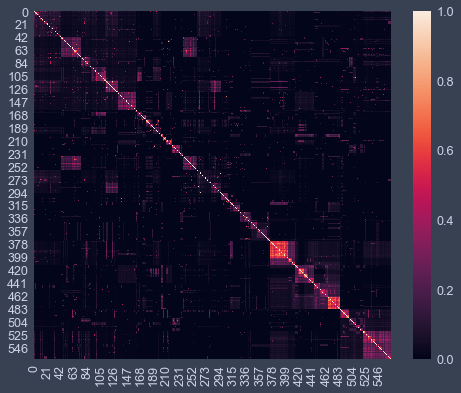

In [132]:
sns.heatmap(sim)

In [119]:
threshold = sim.mean()

In [170]:
row_n = 1
print(f"{'='*32}原文{'='*32}\n", ER_texts[row_n])
print(f"{'='*30}相关文本{'='*30}")
for i in np.where(sim[row_n] > threshold * 5)[0]:
    print(ER_texts[i])

================================原文================================
 ['电网', '运行', '细分', '业务', '故障', '分析']
==============================相关文本==============================
['电网', '运行', '细分', '业务', '稳态', '分析']
['电网', '运行', '细分', '业务', '故障', '分析']
['电网', '运行', '细分', '业务', '机电', '暂态', '分析']
['电网', '运行', '细分', '业务', '国家', '调度', '中心']
['电网', '运行', '细分', '业务', '大区', '电网', '调度', '中心']
['电网', '运行', '细分', '业务', '继电保护']
['电网', '运行', '细分', '业务', '安稳', '装置']
['电网', '运行', '细分', '业务', '潮流', '分析']
['电网', '运行', '细分', '业务网', '损', '分析']
['电网', '运行', '细分', '业务', '无功', '优化']
['电网', '运行', '细分', '业务', '静态', '安全', '分析']
['电网', '运行', '细分', '业务', '谐波分析']
['电网', '运行', '细分', '业务', '短路', '计算']
['电网', '运行', '细分', '业务', '复杂', '故障', '计算']
['电网', '运行', '细分', '业务', '控制参数', '优化']
['电网', '运行', '细分', '业务', '负荷', '预测', '发电', '计划']
['电网', '运行', '细分', '业务', '安全', '经济运行']
['电网', '运行', '细分', '业务', '安全', '分析', '与', '安全控制']
['用电', '侧', '细分', '业务', '市场', '分析', '预测']
['用电', '侧', '细分', '业务', '能耗', '分析']
['电网', '规划', '细分', '业务', '电力系